In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("S02-hw-dataset.csv")
df.head()

In [15]:
df.info()
df.describe()
df.describe(include="object")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,country
count,41
unique,5
top,RU
freq,13


In [6]:
df.isna().mean()
df.duplicated().sum()
df[df.duplicated()]

np.int64(1)

In [16]:
sus_age = df[df["age"] > 100]
sus_age

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [17]:
sus_purchases = df[df["purchases"] <= 0]
sus_purchases

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [18]:
sus_revenue = df[df["revenue"] <= 0]
sus_revenue

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [19]:
country_counts = df["country"].value_counts()
country_counts

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [20]:
country_counts / len(df)

country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: count, dtype: float64

In [21]:
grouped = df.groupby("country").agg(
    mean_age=("age", "mean"),
    mean_purchases=("purchases", "mean"),
    total_revenue=("revenue", "sum"),
)
grouped

,mean_age,mean_purchases,total_revenue
country,,,
CN,24.000000,4.500000,2108
DE,34.600000,6.500000,8673
FR,46.250000,4.250000,8111
RU,30.076923,4.769231,10271
US,36.714286,4.625000,4459


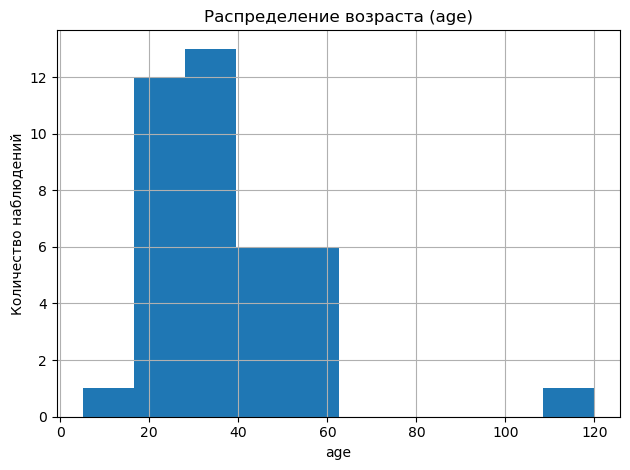

In [22]:
os.makedirs("figures", exist_ok=True)

plt.figure()
df["age"].hist(bins=10)
plt.xlabel("age")
plt.ylabel("Количество наблюдений")
plt.title("Распределение возраста (age)")
plt.tight_layout()

plt.savefig("figures/hist_age.png", dpi=150)
plt.show()

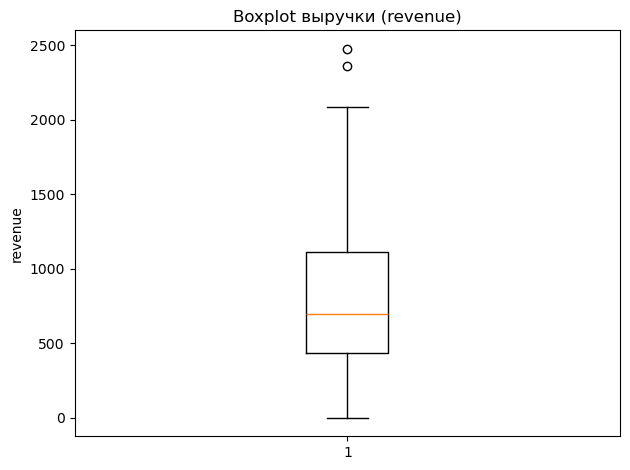

In [23]:
plt.figure()
plt.boxplot(df["revenue"].dropna())
plt.ylabel("revenue")
plt.title("Boxplot выручки (revenue)")
plt.tight_layout()
plt.show()

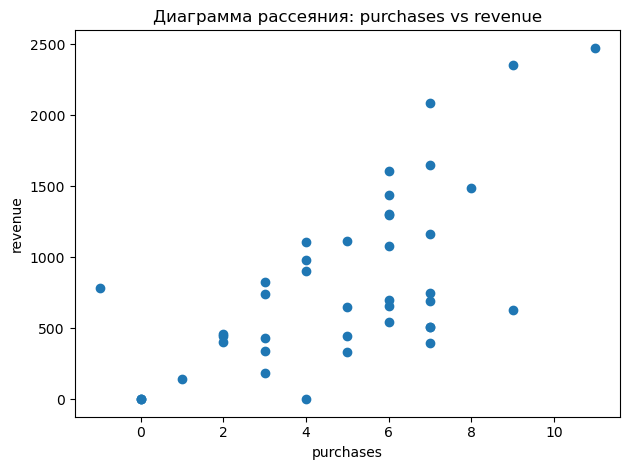

In [24]:
plt.figure()
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("purchases")
plt.ylabel("revenue")
plt.title("Диаграмма рассеяния: purchases vs revenue")
plt.tight_layout()
plt.show()